<a href="https://colab.research.google.com/github/yasir9030/Machine_learning/blob/main/13K-nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]]
[[61  8]
 [ 9 22]]
Accuracy: 0.83


/tmp/ipython-input-39946863.py:81: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


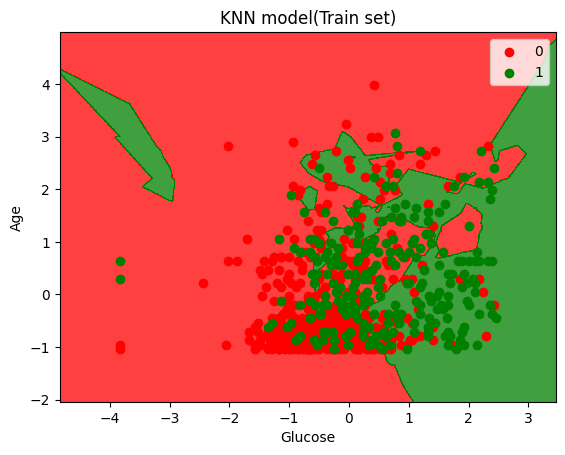

/tmp/ipython-input-39946863.py:126: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


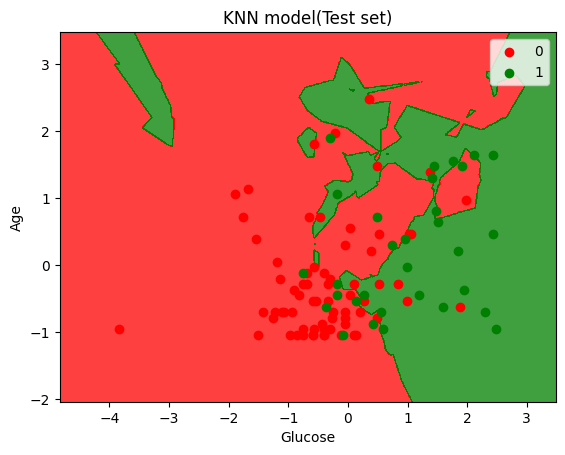

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset
dataset = pd.read_csv('diabetes.csv')

# Selecting only Age & Estimated Salary (2 features for visualization)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.13, random_state=0
)

# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 #Training the KNN model on training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1))

# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# -----------------------------
# Visualising Training Set
# -----------------------------
from matplotlib.colors import ListedColormap

# Define indices for the features to be visualized (e.g., Glucose and Age)
# Based on typical 'diabetes.csv' columns:
# 0: Pregnancies, 1: Glucose, 2: BloodPressure, 3: SkinThickness,
# 4: Insulin, 5: BMI, 6: DiabetesPedigreeFunction, 7: Age
GLUCOSE_IDX = 1 # Using Glucose for one axis
AGE_IDX = 7     # Using Age for the other axis

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, GLUCOSE_IDX].min() - 1, stop=X_set[:, GLUCOSE_IDX].max() + 1, step=0.01),
    np.arange(start=X_set[:, AGE_IDX].min() - 1, stop=X_set[:, AGE_IDX].max() + 1, step=0.01)
)

# Create a full 8-feature array for prediction, filling other features with their means from X_train
X_grid_input = np.zeros((X1.ravel().shape[0], X_train.shape[1]))

X_grid_input[:, GLUCOSE_IDX] = X1.ravel()
X_grid_input[:, AGE_IDX] = X2.ravel()

# Calculate means for other features from X_train
other_feature_indices = [i for i in range(X_train.shape[1]) if i not in [GLUCOSE_IDX, AGE_IDX]]
X_other_features_mean = np.mean(X_train[:, other_feature_indices], axis=0)

for i, idx in enumerate(other_feature_indices):
    X_grid_input[:, idx] = X_other_features_mean[i]

plt.contourf(
    X1, X2,
    classifier.predict(X_grid_input).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green"))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, GLUCOSE_IDX],
        X_set[y_set == j, AGE_IDX],
        c=ListedColormap(("red", "green"))(i),
        label=j
    )

plt.title("KNN model(Train set)")
plt.xlabel("Glucose") # Updated label
plt.ylabel("Age") # Updated label
plt.legend()
plt.show()

# -----------------------------
# Visualising Test Set
# -----------------------------
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, GLUCOSE_IDX].min() - 1, stop=X_set[:, GLUCOSE_IDX].max() + 1, step=0.01),
    np.arange(start=X_set[:, AGE_IDX].min() - 1, stop=X_set[:, AGE_IDX].max() + 1, step=0.01)
)

# Create a full 8-feature array for prediction, filling other features with their means from X_train
# (Using X_train's means to ensure consistency with training data)
X_grid_input = np.zeros((X1.ravel().shape[0], X_test.shape[1]))

X_grid_input[:, GLUCOSE_IDX] = X1.ravel()
X_grid_input[:, AGE_IDX] = X2.ravel()

# Reuse X_other_features_mean calculated from X_train
for i, idx in enumerate(other_feature_indices):
    X_grid_input[:, idx] = X_other_features_mean[i]

plt.contourf(
    X1, X2,
    classifier.predict(X_grid_input).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green"))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, GLUCOSE_IDX],
        X_set[y_set == j, AGE_IDX],
        c=ListedColormap(("red", "green"))(i),
        label=j
    )

plt.title("KNN model(Test set)")
plt.xlabel("Glucose") # Updated label
plt.ylabel("Age") # Updated label
plt.legend()
plt.show()